## Importing all the necessary Modules

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['new_dataset(1).xlsx']))

KeyError: ignored

In [2]:
## please upload the data file from the drive before running the cell
# import io
df = pd.read_csv("new_dataset.xlsx - Sheet1.tsv",delimiter = "\t",names = ["phi","Pressure","Temperature","EGR_percentage","CH4_percentage","H2_percentage","Target"])
df.head()

,phi,Pressure,Temperature,EGR_percentage,CH4_percentage,H2_percentage,Target
0,0.498,20.0,800,0.0,1.0,0.0,0.255
1,0.535,20.0,800,0.0,1.0,0.0,0.296
2,0.569,20.0,800,0.0,1.0,0.0,0.341
3,0.601,20.0,800,0.0,1.0,0.0,0.381
4,0.624,20.0,800,0.0,1.0,0.0,0.422


In [3]:
parameters = df.loc[:,["phi","Pressure","Temperature","EGR_percentage","CH4_percentage","H2_percentage"]]
target = df.loc[:,["Target"]]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(parameters,target,test_size = 0.2,random_state = 10)
y_train = y_train.to_numpy()
y_train = y_train.reshape(628,)

## Training the Models

In [5]:
reg = LinearRegression().fit(x_train,y_train)

In [6]:
regr = MLPRegressor(random_state = 1, max_iter = 500).fit(x_train,y_train)

In [7]:
vector = svm.SVR()
vector.fit(x_train,y_train)

SVR()

In [ ]:
dt = DecisionTreeRegressor(random_state = 0)

In [ ]:
params={"splitter":["best","random"],
            "max_depth" : [2,3,5,7,10,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30] }

## Hyper-Parameter Tuning of attributes of Regression Trees

In [ ]:
grid_search = GridSearchCV(estimator = dt, param_grid = params, cv = 5, scoring = "neg_mean_squared_error")

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [8]:
model = DecisionTreeRegressor(max_depth = 5, max_features = 'auto',max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf = 0.1, splitter = 'best')

In [9]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [10]:
nn = MLPRegressor()

In [11]:
nn.fit(x_train,y_train)

MLPRegressor()

## Prediction using various models

#### Linear Regression

In [12]:
LR_result = reg.predict(x_test)

In [13]:
mean_squared_error(y_test,LR_result)

0.05821672163806878

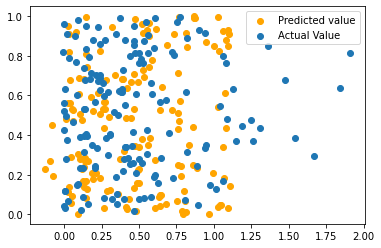

Text(0.5, 1.0, 'Prediction with LR')

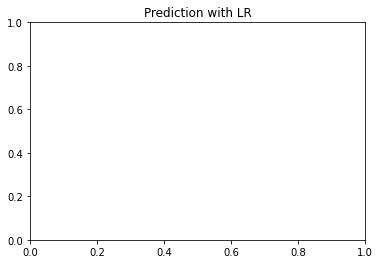

In [14]:
plt.scatter(LR_result,np.random.rand(157),color = "orange",label = "Predicted value")
plt.scatter(y_test,np.random.rand(157),label = "Actual Value")
plt.legend()
plt.show()
plt.title("Prediction with LR")

#### Support Vector Machine

In [ ]:
svm_result = regr.predict(x_test)

In [ ]:
mean_squared_error(y_test,svm_result)

0.0751935449373528

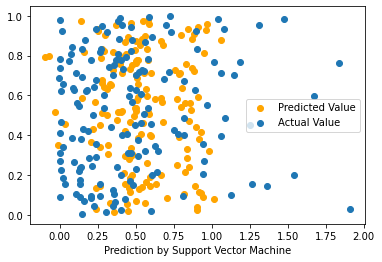

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(svm_result,np.random.rand(157),color = "orange",label = "Predicted Value")
plt.scatter(y_test,np.random.rand(157),label = "Actual Value")
plt.xlabel("Prediction by Support Vector Machine")
plt.legend()
plt.show()
plt.savefig("SVM Prediction")

#### Decision Tree Regressor

In [ ]:
dt_result = model.predict(x_test)

In [ ]:
mean_squared_error(y_test,dt_result)

0.07549658081025358

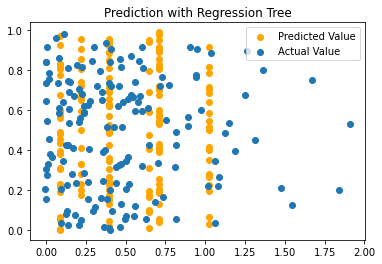

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(dt_result,np.random.rand(157),color = "orange",label = "Predicted Value")
plt.scatter(y_test,np.random.rand(157),label = "Actual Value")
plt.title("Prediction with Regression Tree")
plt.legend()
plt.show()
plt.savefig("Regression Tree Prediction")

#### Neural Network

In [ ]:
nn_result = nn.predict(x_test)

In [ ]:
mean_squared_error(y_test,nn_result)

0.09689343837882394

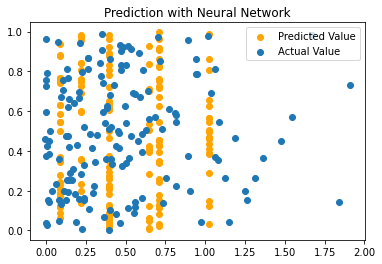

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(dt_result,np.random.rand(157),color = "orange",label = "Predicted Value")
plt.scatter(y_test,np.random.rand(157),label = "Actual Value")
plt.title("Prediction with Neural Network")
plt.legend()
plt.show()
plt.savefig("Neural Network Prediction")

In [ ]:
y_test

,Target
237,0.469000
566,0.579085
68,1.060000
738,0.135760
457,0.402027
...,...
167,0.404000
193,0.124000
194,0.124000
435,0.364189


In [ ]:
LR_result

array([ 0.10842078,  0.44465486,  0.75988487,  0.04411396,  0.63772157,
        0.15956463,  0.14905731,  0.18841885,  1.03405754,  0.10789018,
        0.41252818,  1.0809721 ,  1.07888238,  0.20958125,  0.28720571,
        0.86080184,  0.22862833,  0.52825533,  0.75923354,  0.06047231,
        0.24141796, -0.12610514,  0.73063557, -0.08145933, -0.09456793,
        0.97071482,  1.09160731,  0.75150862,  1.06739509,  0.14386817,
        0.23955735,  0.42021495,  0.63936916,  0.3019805 ,  0.60840244,
        1.00016975,  0.08181975,  0.05931418,  1.02650273,  0.95072654,
        0.13103402,  1.02542049,  0.04110837,  0.833758  ,  0.1377602 ,
        1.0939972 ,  0.60453222,  0.03339114,  0.46638685,  0.49872064,
        0.57494619,  0.43145297,  0.02492967,  0.26535321,  0.81920764,
        0.10017301,  0.08953377,  0.61524912,  0.2627141 ,  1.10975448,
        0.49235318,  0.11690998,  0.13941452,  0.41630558,  1.06437653,
        0.0413164 ,  0.52316229,  0.11601336,  0.47586696,  0.47

In [ ]:
svm_result

array([ 0.50324999,  0.33415666,  0.57555441,  0.27475726,  0.49889038,
        0.35099574,  0.31435489,  0.51991632,  0.83904731, -0.02961472,
        0.44573835,  0.9064154 ,  0.90789184,  0.43113868,  0.46974436,
        0.82158956,  0.4752398 ,  0.46745728,  0.60117945,  0.33180166,
        0.31007446,  0.34692942,  0.75733765, -0.07165312, -0.09541923,
        0.67388906,  0.94078842,  0.87088247,  0.89684144,  0.5045993 ,
        0.2204861 ,  0.51265517,  0.55996875,  0.46689774,  0.50487151,
        0.85867206,  0.42739759,  0.03294387,  0.81463017,  0.84635215,
        0.2515045 ,  0.9799893 ,  0.26427621,  0.79610769,  0.2749599 ,
        0.94851255,  0.58398705,  0.23736488,  0.56948908,  0.5806058 ,
        0.80208597,  0.5117324 ,  0.20785828,  0.5463672 ,  0.50490473,
        0.14388678,  0.43738767,  0.5411658 ,  0.38433781,  1.06118985,
        0.54732348,  0.44097771,  0.28072878,  0.45891082,  0.85277847,
        0.41172255,  0.83538465,  0.52972665,  0.57989619,  0.50

In [ ]:
dt_result

array([0.21822891, 0.71180134, 1.02653826, 0.08768502, 0.71180134,
       0.08768502, 0.08768502, 0.3979251 , 1.02653826, 0.21822891,
       0.21822891, 1.02653826, 1.02653826, 0.3979251 , 0.21822891,
       0.64398213, 0.21822891, 0.3979251 , 0.3979251 , 0.08768502,
       0.21822891, 0.3979251 , 0.64398213, 0.08768502, 0.08768502,
       1.02653826, 1.02653826, 0.71180134, 1.02653826, 0.3979251 ,
       0.3979251 , 0.3979251 , 0.3979251 , 0.3979251 , 0.71180134,
       1.02653826, 0.3979251 , 0.08768502, 1.02653826, 1.02653826,
       0.08768502, 0.71180134, 0.08768502, 0.64398213, 0.08768502,
       1.02653826, 0.71180134, 0.08768502, 0.3979251 , 0.3979251 ,
       0.64398213, 0.21822891, 0.08768502, 0.3979251 , 0.71180134,
       0.08768502, 0.21822891, 0.71180134, 0.21822891, 1.02653826,
       0.71180134, 0.3979251 , 0.08768502, 0.21822891, 1.02653826,
       0.3979251 , 0.64398213, 0.21822891, 0.71180134, 0.3979251 ,
       0.3979251 , 0.21822891, 0.71180134, 0.71180134, 0.39792

In [ ]:
nn_result

array([0.48070098, 0.48970729, 0.58976412, 0.33972168, 0.70315883,
       0.37946259, 0.35704603, 0.67930243, 0.8193492 , 0.06265481,
       0.45033337, 0.86426855, 0.86880522, 0.52573349, 0.44521084,
       0.83451463, 0.46549159, 0.44713376, 0.725088  , 0.37462095,
       0.34752617, 0.48853214, 0.7877762 , 0.07182061, 0.0438544 ,
       0.76229231, 0.88695796, 0.84055566, 0.86709321, 0.67146496,
       0.45804468, 0.56278869, 0.70400116, 0.54198859, 0.6712558 ,
       0.83519332, 0.5251108 , 0.16558589, 0.80348297, 0.83625353,
       0.3185947 , 0.8471228 , 0.33330946, 0.80591775, 0.33294451,
       0.89205661, 0.59521424, 0.31684534, 0.70634982, 0.71203806,
       0.81003139, 0.49070796, 0.29879345, 0.69283691, 0.66761687,
       0.25275511, 0.44040697, 0.34957254, 0.39295985, 0.85807806,
       0.44886818, 0.53128396, 0.33647387, 0.45839217, 0.82886315,
       0.51798535, 0.82223268, 0.49689917, 0.59443255, 0.67493713,
       0.65163787, 0.4196123 , 0.8482062 , 0.43583338, 0.67008

In [ ]:
x_test

,phi,Pressure,Temperature,EGR_percentage,CH4_percentage,H2_percentage
237,0.800000,2.000000,400,0.00000,0.75,0.25
566,1.000000,189.393939,800,0.00000,0.75,0.15
68,1.000000,80.000000,800,0.05960,1.00,0.00
738,0.892239,1.000000,300,0.20000,1.00,0.00
457,1.000000,49.844358,800,0.10000,0.85,0.15
...,...,...,...,...,...,...
167,1.000000,80.000000,800,0.18755,0.75,0.25
193,1.000000,40.000000,800,0.59755,0.75,0.25
194,1.000000,40.000000,800,0.59755,0.75,0.25
435,1.000000,60.194553,800,0.20000,0.85,0.15


##Result and Analysis

In [ ]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


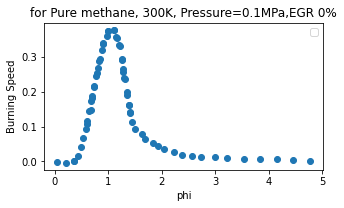

In [ ]:
df_1 = df[(df['Temperature']==300) & (df['Pressure']==1) & (df["EGR_percentage"]==0) & (df["CH4_percentage"]==1) & (df["H2_percentage"]==0)]

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(df_1["phi"],df_1["Target"])
ax.set_xlabel('phi')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for Pure methane, 300K, Pressure=0.1MPa,EGR 0%")  # Add a title to the axes.
ax.legend();

In [ ]:
df_2 = df[(df['Temperature']==300) & (df['Pressure']==1) & (df["EGR_percentage"]==0.2) & (df["CH4_percentage"]==1) & (df["H2_percentage"]==0)]
df_2

,phi,Pressure,Temperature,EGR_percentage,CH4_percentage,H2_percentage,Target
569,0.597917,1.0,300,0.2,1.0,0.0,0.025887
570,0.624784,1.0,300,0.2,1.0,0.0,0.034992
571,0.653892,1.0,300,0.2,1.0,0.0,0.045395
572,0.676282,1.0,300,0.2,1.0,0.0,0.053198
573,0.698650,1.0,300,0.2,1.0,0.0,0.057118
...,...,...,...,...,...,...,...
765,3.522282,1.0,300,0.2,1.0,0.0,0.007006
766,3.901004,1.0,300,0.2,1.0,0.0,0.005724
767,4.216568,1.0,300,0.2,1.0,0.0,0.004436
768,4.563594,1.0,300,0.2,1.0,0.0,0.002489


No handles with labels found to put in legend.


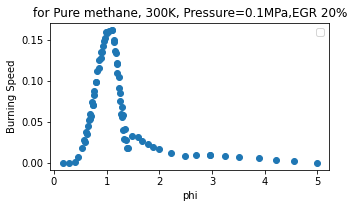

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(df_2["phi"],df_2["Target"])
ax.set_xlabel('phi')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for Pure methane, 300K, Pressure=0.1MPa,EGR 20%")  # Add a title to the axes.
ax.legend();

In [ ]:
df_3 = df[(df['Temperature']==800) & (df['H2_percentage']==0.15) & (df["CH4_percentage"]==0.85) & (df["phi"]==1)]
df_3

,phi,Pressure,Temperature,EGR_percentage,CH4_percentage,H2_percentage,Target
120,1.0,80.000000,800,-0.000842,0.85,0.15,0.539000
121,1.0,80.000000,800,0.025263,0.85,0.15,0.515000
122,1.0,80.000000,800,0.053895,0.85,0.15,0.485000
123,1.0,80.000000,800,0.101053,0.85,0.15,0.432000
124,1.0,80.000000,800,0.125474,0.85,0.15,0.408000
...,...,...,...,...,...,...,...
488,1.0,97.237354,800,0.000000,0.85,0.15,0.472973
489,1.0,103.774319,800,0.000000,0.85,0.15,0.482432
490,1.0,110.038911,800,0.000000,0.85,0.15,0.482432
491,1.0,117.392996,800,0.000000,0.85,0.15,0.496622


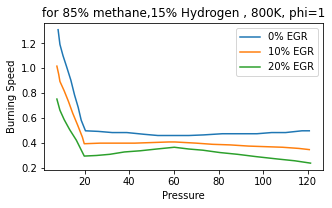

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(df_3["Pressure"].where(df_3["EGR_percentage"]==0),df_3["Target"], label='0% EGR')  # Plot some data on the axes.
ax.plot(df_3["Pressure"].where(df_3["EGR_percentage"]==0.1),df_3["Target"], label='10% EGR')  # Plot more data on the axes...
ax.plot(df_3["Pressure"].where(df_3["EGR_percentage"]==0.2),df_3["Target"], label='20% EGR')  # ... and some more.
ax.set_xlabel('Pressure')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for 85% methane,15% Hydrogen , 800K, phi=1")  # Add a title to the axes.
ax.legend()

In [ ]:
df_4 = df[(df['Temperature']==800) & (df['H2_percentage']==0) & (df["CH4_percentage"]==1) & (df["phi"]==1)]

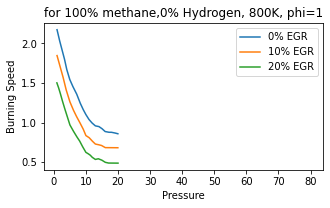

In [ ]:
fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(df_4["Pressure"].where(df_4["EGR_percentage"]==0),df_4["Target"], label='0% EGR')  # Plot some data on the axes.
ax.plot(df_4["Pressure"].where(df_4["EGR_percentage"]==0.1),df_4["Target"], label='10% EGR')  # Plot more data on the axes...
ax.plot(df_4["Pressure"].where(df_4["EGR_percentage"]==0.2),df_4["Target"], label='20% EGR')  # ... and some more.
ax.set_xlabel('Pressure')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for 100% methane,0% Hydrogen, 800K, phi=1")  # Add a title to the axes.
ax.legend()

No handles with labels found to put in legend.


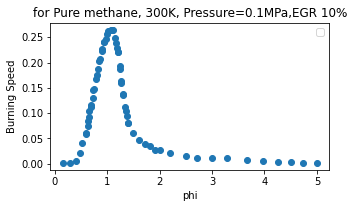

In [ ]:
df_5 = df[(df['Temperature']==300) & (df['Pressure']==1) & (df["EGR_percentage"]==0.1) & (df["CH4_percentage"]==1) & (df["H2_percentage"]==0)]
df_5
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(df_5["phi"],df_5["Target"])
ax.set_xlabel('phi')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for Pure methane, 300K, Pressure=0.1MPa,EGR 10%")  # Add a title to the axes.
ax.legend();

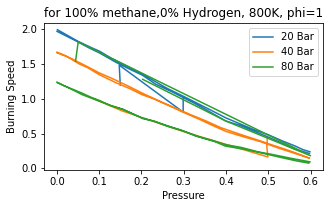

In [ ]:
df_6 = df[(df['Temperature']==800) & (df['H2_percentage']==0) & (df["CH4_percentage"]==1) & (df["phi"]==1)]
fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(df_6["EGR_percentage"].where(df_6["Pressure"]==20),df_6["Target"], label='20 Bar')  # Plot some data on the axes.
ax.plot(df_6["EGR_percentage"].where(df_6["Pressure"]==40),df_6["Target"], label='40 Bar')  # Plot more data on the axes...
ax.plot(df_6["EGR_percentage"].where(df_6["Pressure"]==80),df_6["Target"], label='80 Bar')  # ... and some more.
ax.set_xlabel('Pressure')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for 100% methane,0% Hydrogen, 800K, phi=1")  # Add a title to the axes.
ax.legend()

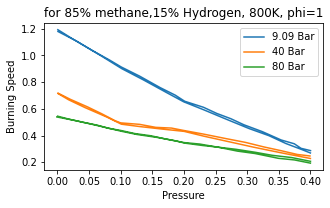

In [ ]:
df_7 = df[(df['Temperature']==800) & (df['H2_percentage']==0.15) & (df["CH4_percentage"]==0.85) & (df["phi"]==1)]
fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(df_7["EGR_percentage"].where(df_7["Pressure"]==9.09),df_7["Target"], label='9.09 Bar')  # Plot some data on the axes.
ax.plot(df_7["EGR_percentage"].where(df_7["Pressure"]==40),df_7["Target"], label='40 Bar')  # Plot more data on the axes...
ax.plot(df_7["EGR_percentage"].where(df_7["Pressure"]==80),df_7["Target"], label='80 Bar')  # ... and some more.
ax.set_xlabel('Pressure')  # Add an x-label to the axes.
ax.set_ylabel('Burning Speed')  # Add a y-label to the axes.
ax.set_title("for 85% methane,15% Hydrogen, 800K, phi=1")  # Add a title to the axes.
ax.legend()